In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import re

In [2]:
domain_list = ['photo', 'art_painting', 'cartoon', 'sketch']
metric = "AUPRC"

# dir_path = "../results/DGAD/method5/1"
dir_path = '../results/devnet/many_versus_many'
dir_path = '../results/DGAD/method5/3'
dir_path = "../results/DGAD/method6_tau"
# dir_path = '../results/DGAD/method5/3'
# dir_path = '../results/DGAD/method5_reg_lambda'
# dir_path = '../results/DGAD/method8'
dir_path = '../results/DGAD/method6_lambda'
# dir_path = '../results/devnet/many_versus_many'
# dir_path = '../results/DGAD/method7'
# dir_path = '../results/DGAD/method7_tau_lambda'

dir_path = '../results/DGAD/method6_revision'
dir_path = '../results/DGAD/method5/3'
dir_path = '../results/DGAD/method5_aug/3'
dir_path = '../results/DGAD/method5_reg_lambda'
dir_path = '../results/DGAD/method10'
dir_path = '../results/DGAD/method9_beta_list'
dir_path = '../results/DGAD/method10_prototype_norm'
dir_path = '../results/DGAD/method9'
dir_path = '../results/DGAD/method9_revision'
dir_path = '../results/DGAD/method9_kmeans'
dir_path = '../results/devnet/one_source_domain'
dir_path = '../results/devnet/many_versus_many'
# dir_path = '../results/DGAD/method6_lambda'
dir_path = '../results/DGAD/method6_revision'
# dir_path = '../results/DGAD/VAE_DEVNET'
# dir_path = '../results/DGAD/method6_2devnet'
# dir_path = '../results/devnet/many_versus_many'
dir_path = '../results/devnet/3domain'
dir_path = '../results/DGAD/method12'
dir_path = '../results/DGAD/method13'
dir_path = '../results/DGAD/method14'
# dir_path = '../old_results/DGAD/method6_lambda'
# dir_path = '../results/DGAD/method13_lambda'
dir_path = '../results/DGAD/VAE_LPIPS'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET'
dir_path = '../results/DGAD/method13'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda'
dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda_no_balance_sample'
# dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda'
dir_path = '../results/DGAD/V_L_D'
dir_path = '../results/DGAD/20240908V_L_D'

dir_path = '../results/devnet/3domain'
# dir_path = '../old_results/devnet/many_versus_many'
# dir_path = '../results/devnet/20240915'
dir_path = '../results/DGAD/latent_dim_DGAD'

dir_path = '../results/DGAD/latent_dim_devnet'

# dir_path = '../results/DGAD/latent_dim_DGAD_lambda'


dir_path = '../results/devnet/20240915'

# dir_path = '../results/DGAD/method13_lambda'

dir_path = '../results/DGAD/latent_dim_CVAE_Unet'
dir_path = '../results/DGAD/latent_dim_CVAE_Unet'

dir_path = '../results/DGAD/VAE_LPIPS_DEVNET_rec_lambda_no_balance_sample'

# dir_path = '../results/DGAD/20240908V_L_D'
dir_path = '../results/DGAD/CVAE_DEVNET_rec_N'
dir_path = '../results/DGAD/method16'

# dir_path = '../results/devnet/20240915'
# dir_path = '../results/DGAD/method16_lambda'

In [3]:
import itertools
# normal_class=["0", "1", "2", "3", "4", "5", "6"]
# normal_class=["0 1 2 3", "4 5 6", "0 2 4 6", "1 3 5", "0", "1", "2", "3", "4", "5", "6"]
# anomaly_class=["4 5 6", "0 1 2 3", "1 3 5", "0 2 4 6", "1 2 3 4 5 6", "0 2 3 4 5 6", "0 1 3 4 5 6", "0 1 2 4 5 6", "0 1 2 3 5 6", "0 1 2 3 4 6", "0 1 2 3 4 5"]
# epochs_list=[5, 10, 15, 20, 30]
# lr_list=[0.01, 0.001, 0.0005, 0.0002, 0.00005, 0.00001]
reg_lambda=[1,2,5,10]
NCE_lambda=[1,2,5,10]
PL_lambda=[1,2,5,10]
# cnt=[0,1,2,3,4]
cnt=[0]
all_para_list = list(itertools.product(reg_lambda, NCE_lambda, PL_lambda, cnt))
print(len(all_para_list))
all_para_list[0]

64


(1, 1, 1, 0)

In [4]:
ans = []
# para_name_list=["normal_class", "anomaly_class", "pre_lr", "pre_epochs", "lr", "epochs", "cnt"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "tau1", "tau2"]
para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt",]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "reg_lambda", "BalancedBatchSampler"]
if dir_path.__contains__("method16_lambda"):
    para_name_list=["normal_class", "anomaly_class", "cnt", "reg_lambda", "NCE_lambda", "PL_lambda", "class_lambda"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "rec_lambda",]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt","reg_lambda"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "tau1", "tau2", "reg_lambda", "NCE_lambda", "PL_lambda"]
# para_name_list=["normal_class", "anomaly_class", "lr", "epochs", "cnt", "origin_svdd_lambda", "class_svdd_lambda", "align_lambda", "beta"]
print(len(os.listdir(dir_path)))
for file_name in os.listdir(dir_path):
    record = []
    data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
    max_epoch = data["val_max_metric"].item()["epoch"]
    # max_epoch = [i for i, val in enumerate(data[f"val_{metric}_list"]) if (val == max(data[f"val_{metric}_list"]))][-1]
    
    for key in para_name_list:
        if key in data["args"].item():
            record.append(data["args"].item()[key])
        else:
            record.append(None)
    
    record.append(max_epoch)

    if "metric" in data["val_max_metric"].item():
        for key in domain_list:
            record.append(0)
        for key in domain_list:
            record.append(0)
        for key in domain_list:
            record.append(data["val_max_metric"].item()["metric"][key]["AUROC"])
        for key in domain_list:
            record.append(data["val_max_metric"].item()["metric"][key]["AUPRC"])
    else:
        for key in domain_list:
            record.append(data["test_metric"].item()[key]["AUROC"])
        for key in domain_list:
            record.append(data["test_metric"].item()[key]["AUPRC"])
        for key in domain_list:
            record.append(data["test_results_list"][max_epoch][key]["AUROC"])
        for key in domain_list:
            record.append(data["test_results_list"][max_epoch][key]["AUPRC"])

    record.append(file_name)
    ans.append(record)

ans = pd.DataFrame(ans,columns=para_name_list + ["max_val_epoch"] +\
             [f'{item}_AUROC' for item in domain_list] + \
                [f'{item}_AUPRC' for item in domain_list] +\
                    [f'val_{item}_AUROC' for item in domain_list] +\
                        [f'val_{item}_AUPRC' for item in domain_list] + ["file_name"])

ans["normal_class"] = ans["normal_class"].astype(str)
ans["anomaly_class"] = ans["anomaly_class"].astype(str)
ans["AUROC_mean"] = ans[["art_painting_AUROC","cartoon_AUROC","photo_AUROC","sketch_AUROC"]].mean(axis = 1)
ans["AUPRC_mean"] = ans[["art_painting_AUPRC","cartoon_AUPRC","photo_AUPRC","sketch_AUPRC"]].mean(axis = 1)
ans["val_AUROC_mean"] = ans[["val_art_painting_AUROC","val_cartoon_AUROC","val_photo_AUROC","val_sketch_AUROC"]].mean(axis = 1)
ans["val_AUPRC_mean"] = ans[["val_art_painting_AUPRC","val_cartoon_AUPRC","val_photo_AUPRC","val_sketch_AUPRC"]].mean(axis = 1)
ans["normal_class"] = ans["normal_class"].apply(lambda x :re.sub("\[|\]|,", "", x))
ans["anomaly_class"] = ans["anomaly_class"].apply(lambda x :re.sub("\[|\]|,", "", x))
ans.head(5)

252


,normal_class,anomaly_class,lr,epochs,cnt,max_val_epoch,photo_AUROC,art_painting_AUROC,cartoon_AUROC,sketch_AUROC,...,val_sketch_AUROC,val_photo_AUPRC,val_art_painting_AUPRC,val_cartoon_AUPRC,val_sketch_AUPRC,file_name,AUROC_mean,AUPRC_mean,val_AUROC_mean,val_AUPRC_mean
0,2,0 1 3 4 5 6,0.00005,30,0,8,0,0,0,0,...,0.904444,0.976190,0.976190,0.799603,0.651709,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.969392,0.850923
1,3,0 1 2 4 5 6,0.00010,40,2,9,0,0,0,0,...,1.000000,1.000000,0.948413,1.000000,1.000000,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.997685,0.987103
2,0,1 2 3 4 5 6,0.00010,40,0,0,0,0,0,0,...,0.899351,0.915079,0.469246,0.737662,0.447753,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.910608,0.642435
3,0,1 2 3 4 5 6,0.00005,30,0,3,0,0,0,0,...,0.887446,0.948413,0.620992,0.704667,0.340567,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.890872,0.653660
4,6,0 1 2 3 4 5,0.00005,30,1,18,0,0,0,0,...,0.927083,1.000000,0.873413,0.933333,0.821759,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.0,0.0,0.977841,0.907126


In [5]:
# ans = ans[ans["epochs"] != 2]
# if dir_path.__contains__("devnet"):
#     ans = ans[ans["lr"] != 0.00005]
# ans = ans[ans["cnt"] == 10]
# ans = ans[ans["BalancedBatchSampler"]==0]

In [6]:
ans["normal_class"].value_counts()

2    36
3    36
0    36
6    36
1    36
4    36
5    36
Name: normal_class, dtype: int64

In [7]:
ans.cnt.value_counts()

0    84
2    84
1    84
Name: cnt, dtype: int64

In [8]:
# pre_epochs_list = [10, 30, 50, 100]
# pre_lr_list = [0.01, 0.001, 0.0001]
# epochs_list = [10, 20, 30]
# lr_list = [0.00001, 0.0001, 0.001]
# cnt = [0, 1]
# all_para_list = list(itertools.product(cnt, pre_epochs_list, pre_lr_list, epochs_list, lr_list))
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[["cnt", "pre_epochs", "pre_lr", "epochs", "lr"]].values])
# remain_para = pd.DataFrame(sorted(remain_para), columns=["cnt", "pre_epochs", "pre_lr", "epochs", "lr"])
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# # remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [9]:
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[(ans["epochs"]==30) & (ans["lr"]==0.00005) & (ans["cnt"] == 0)][["reg_lambda", "NCE_lambda", "PL_lambda", "cnt"]].values])
# remain_para = pd.DataFrame(remain_para, columns=["reg_lambda", "NCE_lambda", "PL_lambda", "cnt"])
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# # remain_para
# len(remain_para)

In [10]:
# remain_para = set(all_para_list) - set([tuple(item) for item in ans[["normal_class", "epochs", "lr", "cnt"]].values])
# remain_para = pd.DataFrame(remain_para, columns=["normal_class", "epochs", "lr", "cnt"])
# remain_para.insert(1,"anomaly_class", remain_para.apply(lambda x: re.sub("\{|,|\}","", str(set([0,1,2,3,4,5,6]) - set(map(int, x["normal_class"].split(" "))))), axis=1))
# print(f"./{dir_path.split('/')[-1]}_remain_para.csv")
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [11]:
if metric == "AUPRC":
    columns_to_drop = ans.filter(like='AUROC').columns.to_list()
    columns_to_drop.remove("val_AUROC_mean")
else:
    columns_to_drop = ans.filter(like='AUPRC').columns.to_list()
    columns_to_drop.remove("val_AUPRC_mean")
columns_to_drop = columns_to_drop + [f"photo_{metric}",f"art_painting_{metric}",f"cartoon_{metric}",f"sketch_{metric}",f"{metric}_mean"]
ans = ans.drop(columns=columns_to_drop) 
columns_to_drop

['photo_AUROC',
 'art_painting_AUROC',
 'cartoon_AUROC',
 'sketch_AUROC',
 'val_photo_AUROC',
 'val_art_painting_AUROC',
 'val_cartoon_AUROC',
 'val_sketch_AUROC',
 'AUROC_mean',
 'photo_AUPRC',
 'art_painting_AUPRC',
 'cartoon_AUPRC',
 'sketch_AUPRC',
 'AUPRC_mean']

In [12]:
agg_method = {"cnt":["count"],
              "max_val_epoch":["mean", "std"],
              f"val_photo_{metric}":["mean", "std"],
              f"val_art_painting_{metric}":["mean", "std"],
              f"val_cartoon_{metric}":["mean", "std"],
              f"val_sketch_{metric}":["mean", "std"],
              f"val_{metric}_mean":["mean", "std"],
              f"val_AUROC_mean":["mean", "std"],
              f"val_AUPRC_mean":["mean", "std"],
              }

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

for normal_class in ["0", "1", "2", "3", "4", "5", "6"]:
    selected_records = ans[ans["normal_class"] == normal_class].drop(["normal_class", "anomaly_class"],axis=1)
    # group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
    group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
    group_key.sort()
    # print(group_key)
    selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
    selected_para = selected_records_anslysis.index[0]
    # print(selected_para)
    selected_records_anslysis

    filter = None
    for idx, item in enumerate(group_key):
        if filter is None:
            filter = selected_records[item] == selected_para[idx]
        else:
            filter = filter & (selected_records[item] == selected_para[idx])
    temp = selected_records[filter].agg(["mean", "std"]).T
    temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
    for key in [f'val_{item}_{metric}' for item in domain_list]:
        print(temp.loc[key]["res"])
    print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
    selected_records[filter]

94.34(4.9)
49.18(3.64)
71.08(3.12)
48.77(4.12)
65.84(2.33)
100.0(0.0)
99.21(1.37)
97.35(2.79)
65.05(7.71)
90.4(2.68)
100.0(0.0)
97.78(3.85)
90.69(2.98)
47.87(5.52)
84.08(2.08)
100.0(0.0)
100.0(0.0)
100.0(0.0)
100.0(0.0)
100.0(0.0)
97.02(1.03)
75.09(7.25)
59.18(1.04)
51.64(2.37)
70.73(1.76)
100.0(0.0)
100.0(0.0)
100.0(0.0)
100.0(0.0)
100.0(0.0)
100.0(0.0)
87.54(2.09)
91.15(4.78)
79.95(2.39)
89.66(1.3)


/tmp/ipykernel_26001/2829607335.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T
/tmp/ipykernel_26001/2829607335.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T
/tmp/ipykernel_26001/2829607335.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T
/tmp/ipykernel_26001/2829607335.py:32: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these 

In [13]:
# ans[(ans["normal_class"] == normal_class)].sort_values(by="val_AUROC_mean",ascending=False)

In [14]:
# remain_para = []
# for item in selected_records_anslysis.index[:10]:
#     remain_para.append(list(item))
# remain_para = pd.DataFrame(remain_para)
# remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)

In [15]:
# remain_para = []
# for item in selected_records_anslysis.index[:10]:
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],2])
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],3])
#     remain_para.append(["0","1 2 3 4 5 6",item[1],item[0],4])
    
# remain_para = pd.DataFrame(remain_para,columns=["normal_class", "anomaly_class", "epochs", "lr", "cnt"])
# # remain_para.to_csv(f"./{dir_path.split('/')[-1]}_remain_para.csv",index=None, header=None)
# remain_para

In [16]:
agg_method = {"cnt":["count"],
              "max_val_epoch":["mean", "std"],
              f"val_photo_{metric}":["mean", "std"],
              f"val_art_painting_{metric}":["mean", "std"],
              f"val_cartoon_{metric}":["mean", "std"],
              f"val_sketch_{metric}":["mean", "std"],
              f"val_{metric}_mean":["mean", "std"],
              f"val_AUROC_mean":["mean", "std"],
              f"val_AUPRC_mean":["mean", "std"],
              }

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
normal_class = '0'
selected_records = ans[ans["normal_class"] == normal_class].drop(["normal_class", "anomaly_class"],axis=1)
# group_key = ["pre_lr", "pre_epochs", "lr", "epochs"]
group_key = list(set(para_name_list) - set(["normal_class", "anomaly_class", "cnt"]))
group_key.sort()
print(group_key)
selected_records_anslysis = selected_records.groupby(group_key).agg(agg_method).sort_values(by=(f"val_{metric}_mean", "mean"), ascending=False)
selected_para = selected_records_anslysis.index[0]
print(selected_para)
selected_records_anslysis

['epochs', 'lr']
(40, 0.0001)


cnt max_val_epoch           val_photo_AUPRC            \
               count          mean       std            mean       std   
epochs lr                                                                
40     0.00010     3      0.000000  0.000000        0.943386  0.049029   
20     0.00005     3      2.000000  1.000000        0.920238  0.025982   
40     0.00001     3     10.000000  1.732051        0.875265  0.054237   
30     0.00005     3      3.000000  1.000000        0.924735  0.020621   
40     0.00005     3      2.333333  0.577350        0.907341  0.055269   
30     0.00010     3      1.333333  1.154701        0.964286  0.030993   
       0.00001     3      8.666667  3.511885        0.866138  0.021765   
20     0.00010     3      2.333333  2.516611        0.909524  0.051811   
       0.00001     3      8.666667  2.081666        0.874934  0.044938   
       0.00050     3      2.000000  2.645751        0.897331  0.091553   
30     0.00050     3      2.000000  2.645751        0.919853  0.013445   
40     0.00050     3      2.666667  4.618802        0.800673  0.035840   

               val_art_painting_AUPRC           val_cartoon_AUPRC            \
                                 mean       std              mean       std   
epochs lr                                                                     
40     0.00010               0.491809  0.036431          0.710820  0.031170   
20     0.00005               0.479829  0.082021          0.745574  0.022323   
40     0.00001               0.539397  0.019547          0.672105  0.019088   
30     0.00005               0.572456  0.044978          0.722802  0.062721   
40     0.00005               0.496660  0.049554          0.734247  0.047643   
30     0.00010               0.489476  0.063222          0.657199  0.054976   
       0.00001               0.495960  0.087114          0.684002  0.049662   
20     0.00010               0.519124  0.040236          0.701169  0.053029   
       0.00001               0.508371  0.078734          0.681760  0.028424   
       0.00050               0.577568  0.219518          0.475956  0.124841   
30     0.00050               0.583093  0.105982          0.548483  0.217384   
40     0.00050               0.369394  0.040794          0.501219  0.181460   

               val_sketch_AUPRC           val_AUPRC_mean            \
                           mean       std           mean       std   
epochs lr                                                            
40     0.00010         0.487687  0.041170       0.658425  0.023265   
20     0.00005         0.468402  0.058151       0.653511  0.024247   
40     0.00001         0.495555  0.037594       0.645580  0.019452   
30     0.00005         0.358195  0.015692       0.644547  0.013389   
40     0.00005         0.428654  0.027601       0.641726  0.019486   
30     0.00010         0.449531  0.171939       0.640123  0.050346   
       0.00001         0.474384  0.035640       0.630121  0.040086   
20     0.00010         0.384226  0.102386       0.628510  0.007975   
       0.00001         0.415865  0.081184       0.620233  0.020471   
       0.00050         0.340672  0.243763       0.572882  0.032986   
30     0.00050         0.225132  0.082538       0.569140  0.083675   
40     0.00050         0.324281  0.194237       0.498892  0.104692   

               val_AUROC_mean            
                         mean       std  
epochs lr                                
40     0.00010       0.914883  0.005970  
20     0.00005       0.910324  0.011157  
40     0.00001       0.907177  0.008071  
30     0.00005       0.904189  0.012282  
40     0.00005       0.901745  0.003535  
30     0.00010       0.885974  0.029159  
       0.00001       0.896592  0.019336  
20     0.00010       0.877260  0.008221  
       0.00001       0.898995  0.006860  
       0.00050       0.805257  0.020111  
30     0.00050       0.840971  0.015875  
40     0.00050       0.812802  0.039420

In [17]:
# tmp = pd.DataFrame([["0","1","1","1"],
# ["1","1","1","0"],
# ["1","1","0","1"],
# ["0","1","1","0"],
# ["0","1","0","1"],
# ["1","1","0","0"],
# ["1","0","0","1"],
# ["1","0","0","0"],
# ["0","0","0","1"],
# ["0","0","0","0"],], columns = ["NCE_lambda","PL_lambda","class_lambda","reg_lambda"], dtype=float)

# for item in list(map(tuple,tmp.to_numpy())):
#     record = selected_records_anslysis.loc[item]
#     for key in [f'val_{item}_{metric}' for item in domain_list]:
#         print(f'{round(record.loc[key]["mean"] * 100, 2)}({round(record.loc[key]["std"] * 100, 2)})', end='\t')
#     print(f'{round(record[f"val_{metric}_mean"]["mean"] * 100, 2)}({round(record[f"val_{metric}_mean"]["std"] * 100, 2)})', end='\t')
#     print()

In [18]:
filter = None
for idx, item in enumerate(group_key):
    if filter is None:
        filter = selected_records[item] == selected_para[idx]
    else:
        filter = filter & (selected_records[item] == selected_para[idx])
temp = selected_records[filter].agg(["mean", "std"]).T
temp["res"] = temp.apply(lambda x: f'{round(x["mean"] *100, 2)}({round(x["std"] *100, 2)})', axis=1)
for key in [f'val_{item}_{metric}' for item in domain_list]:
    print(temp.loc[key]["res"])
print(f'{round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["mean"] * 100, 2)}({round(selected_records_anslysis.loc[selected_para][f"val_{metric}_mean"]["std"] * 100, 2)})')
selected_records[filter]

94.34(4.9)
49.18(3.64)
71.08(3.12)
48.77(4.12)
65.84(2.33)


/tmp/ipykernel_26001/1079342940.py:7: FutureWarning: ['file_name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  temp = selected_records[filter].agg(["mean", "std"]).T


,lr,epochs,cnt,max_val_epoch,val_photo_AUPRC,val_art_painting_AUPRC,val_cartoon_AUPRC,val_sketch_AUPRC,file_name,val_AUROC_mean,val_AUPRC_mean
2,0.0001,40,0,0,0.915079,0.469246,0.737662,0.447753,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.910608,0.642435
24,0.0001,40,1,0,0.915079,0.472343,0.718164,0.485317,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.921705,0.647726
146,0.0001,40,2,0,1.000000,0.533837,0.676634,0.529990,"method=16,backbone=DGAD15,domain_cnt=3,normal_...",0.912338,0.685115


In [19]:
file_name = selected_records[filter].file_name.iloc[0]
data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
data

NpzFile '../results/DGAD/method16/method=16,backbone=DGAD15,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6],batch_size=30,steps_per_epoch=20,epochs=40,lr=0.0001,tau1=0.07,tau2=0.07,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,cnt=0.npz' with keys: val_max_metric, train_results_loss, sub_train_results_loss, val_results_loss, val_AUROC_list...

In [20]:

# # data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
# file_name = 'results/DGAD/VAE_LPIPS/method=VAE_LPIPS,backbone=VAE,domain_cnt=3,normal_class=[0],anomaly_class=[1, 2, 3, 4, 5, 6],batch_size=30,steps_per_epoch=20,epochs=250,lr=0.0001,tau1=0.07,tau2=0.07,reg_lambda=1.0,NCE_lambda=1.0,PL_lambda=1.0,BalancedBatchSampler=1,cnt=2.npz'
# data = np.load(f'../{file_name}', allow_pickle=True)
# data
# max_val_epoch = data["val_max_metric"].item()["epoch"]
# plt.plot(data["train_results_loss"].mean(axis=1)[0:], label = "train")
# plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.plot(data["val_results_loss"].mean(axis=1), label = "val")
# plt.legend()
# data["train_results_loss"].mean(axis=1)[-10:], data["val_results_loss"].mean(axis=1)[-10:]

In [21]:
# tmp_list = []
# for file_name in selected_records[filter].file_name:
#     data = np.load(f'{dir_path}/{file_name}', allow_pickle=True)
#     domain_test_trends = dict()
#     for domain in domain_list:
#         domain_test_trends[domain]={
#             "test_loss_list":[],
#             "AUROC":[],
#             "AUPRC":[],
#         }

#     for res in data["test_results_list"]:
#         if res is not None:
#             for key in res:
#                 domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
#                 domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
#                 domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])
#     tmp = []
#     for domain in domain_list:
#         tmp.append(domain_test_trends[domain][metric][-1]) 
#     tmp.append(np.mean(tmp))
#     tmp_list.append(tmp)

# pd.DataFrame(tmp_list, columns = domain_list + [metric]).agg(["mean", "std"])

In [22]:
domain_test_trends = dict()
for domain in domain_list:
    domain_test_trends[domain]={
        "test_loss_list":[],
        "AUROC":[],
        "AUPRC":[],
    }

domain_test_trends
for res in data["test_results_list"]:
    if res is not None:
        for key in res:
            domain_test_trends[key]["test_loss_list"].append(np.array(res[key]["test_loss_list"]).mean())
            domain_test_trends[key]["AUROC"].append(res[key]["AUROC"])
            domain_test_trends[key]["AUPRC"].append(res[key]["AUPRC"])

### 训练过程中 模型在test上下降趋势

In [23]:
data["args"].item()["epochs"], data["args"].item()["test_epoch"]

(40, 5)

In [24]:
data["test_results_list"].shape

(40,)

0
photo [0.9150793650793649, 0.976190476190476, 0.7777777777777778, 0.9484126984126984, 0.9484126984126984, 0.9305555555555556, 0.876984126984127, 0.861111111111111, 0.876984126984127]
art_painting [0.46924603174603174, 0.39687605642012, 0.43030525030525035, 0.4561503028816343, 0.4360965981655637, 0.3996825101348556, 0.43232518232518224, 0.41653140294906, 0.41973304473304474]
cartoon [0.7376623376623376, 0.8268321513002365, 0.6801594746716697, 0.7036591880341879, 0.6584967320261437, 0.7103174603174602, 0.5581521739130435, 0.5484848484848485, 0.5481334841628959]
sketch [0.44775272397094434, 0.46097935880544577, 0.4493851559068951, 0.12757740000184895, 0.21419954783016593, 0.11442700817700818, 0.0963995813995814, 0.09649053432329348, 0.09926258896787997]


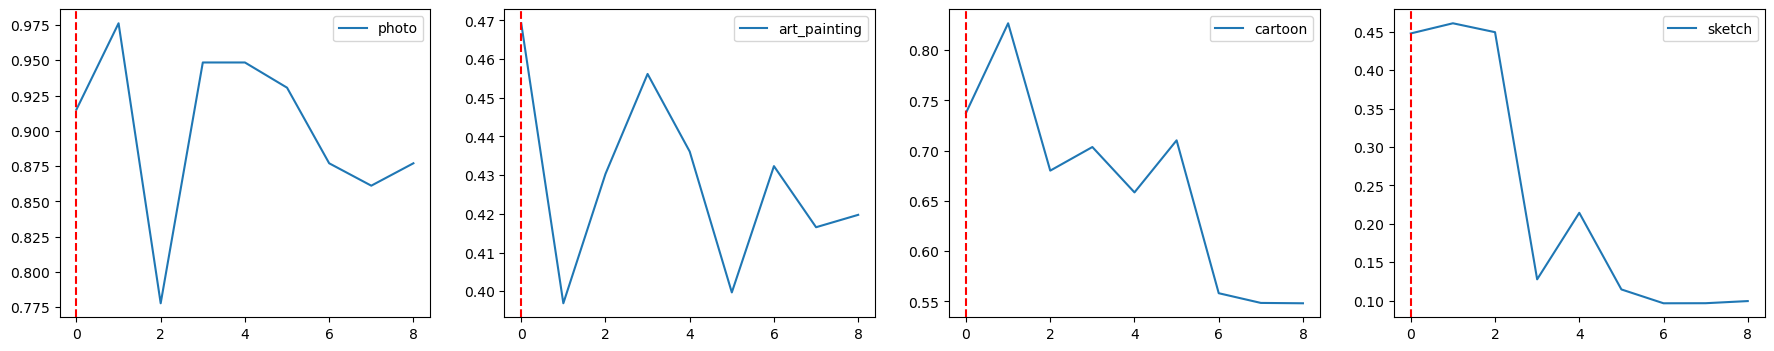

0
photo 0.9150793650793649
art_painting 0.46924603174603174
cartoon 0.7376623376623376
sketch 0.44775272397094434


In [25]:
max_val_epoch = data["val_max_metric"].item()['epoch']
print(max_val_epoch)

fig, ax = plt.subplots(1,4, figsize=(22, 4))

for idx, domain in enumerate(domain_list):
    ax[idx].plot(domain_test_trends[domain][metric], label = domain)
    print(domain, domain_test_trends[domain][metric])

    if "metric" in data["val_max_metric"].item():
        if "test_epoch" in data["args"].item():
            ax[idx].axvline(x=max_val_epoch / data["args"].item()["test_epoch"], color='r', linestyle='--')
        else:
            ax[idx].axvline(x=max_val_epoch / 5, color='r', linestyle='--')
    else:
        ax[idx].axvline(x=max_val_epoch, color='r', linestyle='--')

    ax[idx].legend()
plt.show()

print(max_val_epoch)
if "metric" in data["val_max_metric"].item():
    for domain in domain_list:
        print(domain, data["val_max_metric"].item()["metric"][domain][metric])
else:
    for domain in domain_list:
        print(domain, domain_test_trends[domain][metric][max_val_epoch])

### 训练集loss下降趋势

(0,
 array([ 4.00245974,  1.35107064,  0.80341005,  0.437133  ,  0.21250709,
        -0.06145964, -0.1812713 , -0.16106424, -0.2359476 , -0.16628433,
        -0.2619974 , -0.30550072, -0.30319884, -0.28664789, -0.31309992,
        -0.33482764, -0.30175546, -0.29942325, -0.3392067 , -0.3190499 ,
        -0.36675161, -0.34793262, -0.35652117, -0.3116754 , -0.35218661,
        -0.32352853, -0.3470627 , -0.33936586, -0.330746  , -0.36078778,
        -0.35869332, -0.35010128, -0.37647508, -0.32927591, -0.33905574,
        -0.36615957, -0.36279667, -0.33589068, -0.3495428 , -0.34951897]))

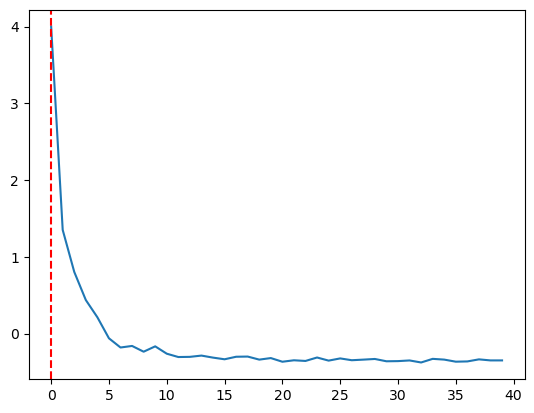

In [26]:
plt.plot(data["train_results_loss"].mean(axis=1))
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
max_val_epoch, data["train_results_loss"].mean(axis=1)

### 训练过程中，模型在val 下降趋势

#### 验证集loss下降趋势

array([0.53627065, 0.44447623, 0.43537452, 0.46541401, 0.45053277,
       0.45581445, 0.46701209, 0.44964947, 0.48162314, 0.48633874,
       0.50069946, 0.49744087, 0.49841995, 0.49340458, 0.45201633,
       0.47261149, 0.47400102, 0.47418011, 0.4818098 , 0.47980798,
       0.48938043, 0.50147236, 0.48686388, 0.48068251, 0.48301475,
       0.48473446, 0.49776486, 0.49355415, 0.48505677, 0.49218365,
       0.487647  , 0.48635541, 0.48039273, 0.47012482, 0.4800305 ,
       0.47560446, 0.47305823, 0.47862877, 0.48274692, 0.47109377])

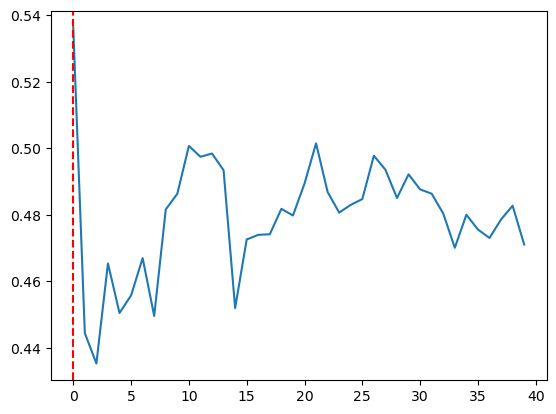

In [27]:
plt.plot(data["val_results_loss"].mean(axis=1))
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
data["val_results_loss"].mean(axis=1)

#### 验证集AUROC

array([0.91594517, 0.89177489, 0.86976912, 0.80735931, 0.84559885,
       0.84920635, 0.84559885, 0.85858586, 0.82647908, 0.84126984,
       0.82828283, 0.79040404, 0.79401154, 0.81457431, 0.79437229,
       0.77344877, 0.76479076, 0.76154401, 0.78787879, 0.82359307,
       0.81168831, 0.78751804, 0.79473304, 0.78823954, 0.76587302,
       0.77453102, 0.77164502, 0.77128427, 0.77200577, 0.76911977,
       0.76479076, 0.76262626, 0.76875902, 0.75721501, 0.75685426,
       0.76082251, 0.75505051, 0.75829726, 0.76010101, 0.75577201])

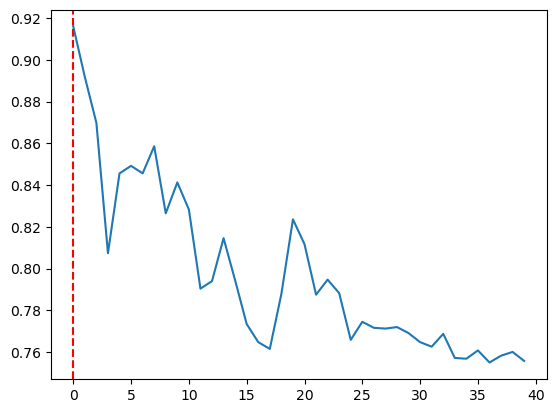

In [28]:
plt.plot(data[f"val_AUROC_list"])
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
data[f"val_AUROC_list"]

array([0.78668011, 0.77872295, 0.7560555 , 0.60524618, 0.60976931,
       0.65806492, 0.63376479, 0.6645062 , 0.55799301, 0.62469116,
       0.61389964, 0.60789833, 0.61146742, 0.63387548, 0.62716907,
       0.62793476, 0.59531835, 0.57708493, 0.60989726, 0.65395803,
       0.62760557, 0.64172932, 0.65048912, 0.65624267, 0.6174858 ,
       0.66436504, 0.64541764, 0.64690644, 0.64551453, 0.62358305,
       0.64011863, 0.63871976, 0.65858431, 0.63883289, 0.63487959,
       0.66556388, 0.62924647, 0.66105664, 0.65614826, 0.6588213 ])

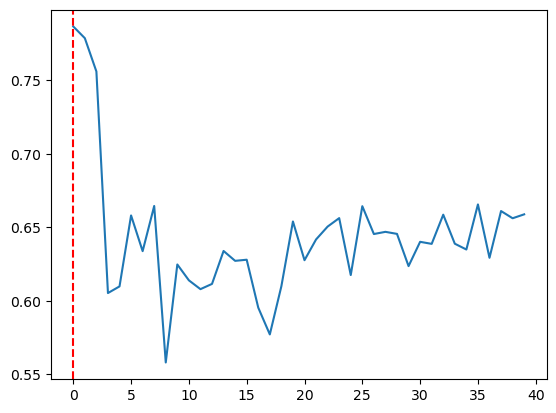

In [29]:
plt.plot(data[f"val_{metric}_list"])
plt.axvline(x=max_val_epoch, color='r', linestyle='--')
# plt.ylim(0.5,1)
data[f"val_{metric}_list"]

[2.42932423 2.10220145 1.65034596 1.27578461 1.1028474  0.85252118
 0.74100509 0.76387079 0.72351105 0.77882528 0.69576384 0.68493348
 0.69460908 0.69476475 0.68238636 0.67798974 0.69543105 0.70625263
 0.6686148  0.67923981 0.6554362  0.66661644 0.6630286  0.68452205
 0.64066891 0.67972833 0.6639616  0.67490653 0.67113118 0.6464077
 0.65141013 0.65800997 0.6490555  0.66412092 0.65530212 0.65009249
 0.65756099 0.66938409 0.65670505 0.64703972]


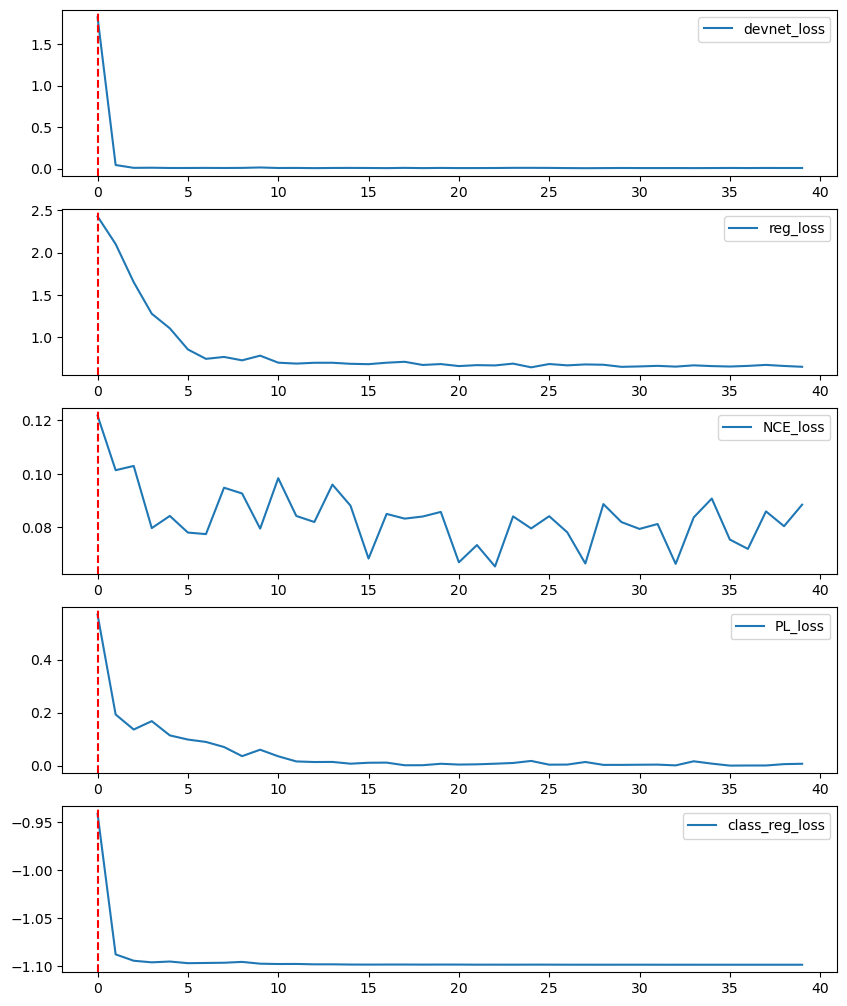

In [30]:
temp = data["sub_train_results_loss"].mean(axis=1)
fig,ax = plt.subplots(temp.shape[1],1,figsize=(10,2.5 * temp.shape[1]))
if dir_path.__contains__("method13"):
    loss_name_list = ["devnet_loss", "reg_loss", "NCE_loss", "PL_loss", "class_reg_loss"]
elif dir_path.__contains__("VAE_LPIPS_DEVNET"):
    loss_name_list = ["rec_loss", "kl_loss", "devnet_loss", "reg_loss", "PL_loss", "class_reg_loss"]
else:
    loss_name_list = ["devnet_loss", "reg_loss", "NCE_loss", "PL_loss", "class_reg_loss"]
for idx, label in enumerate(loss_name_list):
    ax[idx].plot(temp[0:,idx], label=label)
    ax[idx].axvline(x=max_val_epoch, color='r', linestyle='--')
    ax[idx].legend()

# for i in range(5):
#     print(temp[0:,i])
print(temp[0:, 1])
plt.show()

In [31]:
import math
-(1/3)*math.log(1/3)*3
-(0.01)*math.log(0.01) * 2 + (-0.98*math.log(0.98))

0.1119020568909309

In [32]:
# data["sub_train_results_loss"].mean(axis=1)

In [33]:
if "pre_epochs" in para_name_list:
    temp = []
    for item in file_name.split(","):
        if re.match("epochs=|lr=|reg_lambda", item):
            pass
        else:
            temp.append(item)
    data = np.load(f'../experiment/{",".join(temp)}', allow_pickle=True)

In [34]:
plt.plot(data["pre_train_results_loss"].mean(axis=1))

KeyError: 'pre_train_results_loss is not a file in the archive'

In [ ]:
temp = data["sub_pre_train_results_loss"].mean(axis=1)
fig,ax = plt.subplots(2,1,figsize=(6, 6))
ax[0].plot(temp[0:,0], label="NCE_loss")
ax[1].plot(temp[0:,1], label="PL_loss") 
ax[0].legend()
ax[1].legend()
plt.show()

: 

In [ ]:
temp[0:,0]

: 

In [ ]:
temp[0:,1]

: 